In [6]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd


In [13]:
import pandas as pd

data = {
    'text': [
        "I love the new iPhone, it's amazing!",
        "The service at this restaurant was terrible.",
        "Excited about the new movie release!",
        "Disappointed with the customer support.",
        "Loving the new updates on the software.",
        "The product quality is poor.",
        "This f***ing movie sucks!",
        "Just got my new laptop, it's f***ing awesome!",
        "Can't believe the s****y service I received today.",
        "Neutral comment about the weather.",
        "This app is so damn cool!",
        "Meh, the food was okay, nothing special.",
    ],
    'sentiment': [
        'positive',
        'negative',
        'positive',
        'negative',
        'positive',
        'negative',
        'negative',
        'positive',
        'negative',
        'neutral',
        'positive',
        'neutral'
    ]
}

df = pd.DataFrame(data)
print(df)


                                                 text sentiment
0                I love the new iPhone, it's amazing!  positive
1        The service at this restaurant was terrible.  negative
2                Excited about the new movie release!  positive
3             Disappointed with the customer support.  negative
4             Loving the new updates on the software.  positive
5                        The product quality is poor.  negative
6                           This f***ing movie sucks!  negative
7       Just got my new laptop, it's f***ing awesome!  positive
8   Can't believe the s****y service I received to...  negative
9                  Neutral comment about the weather.   neutral
10                          This app is so damn cool!  positive
11           Meh, the food was okay, nothing special.   neutral


In [10]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()


In [11]:
# Function to get sentiment score
def get_sentiment_score(text):
    scores = sid.polarity_scores(text)
    return scores['compound']  # Use compound score for overall sentiment

# Apply sentiment analysis to each text
df['sentiment_score'] = df['text'].apply(get_sentiment_score)


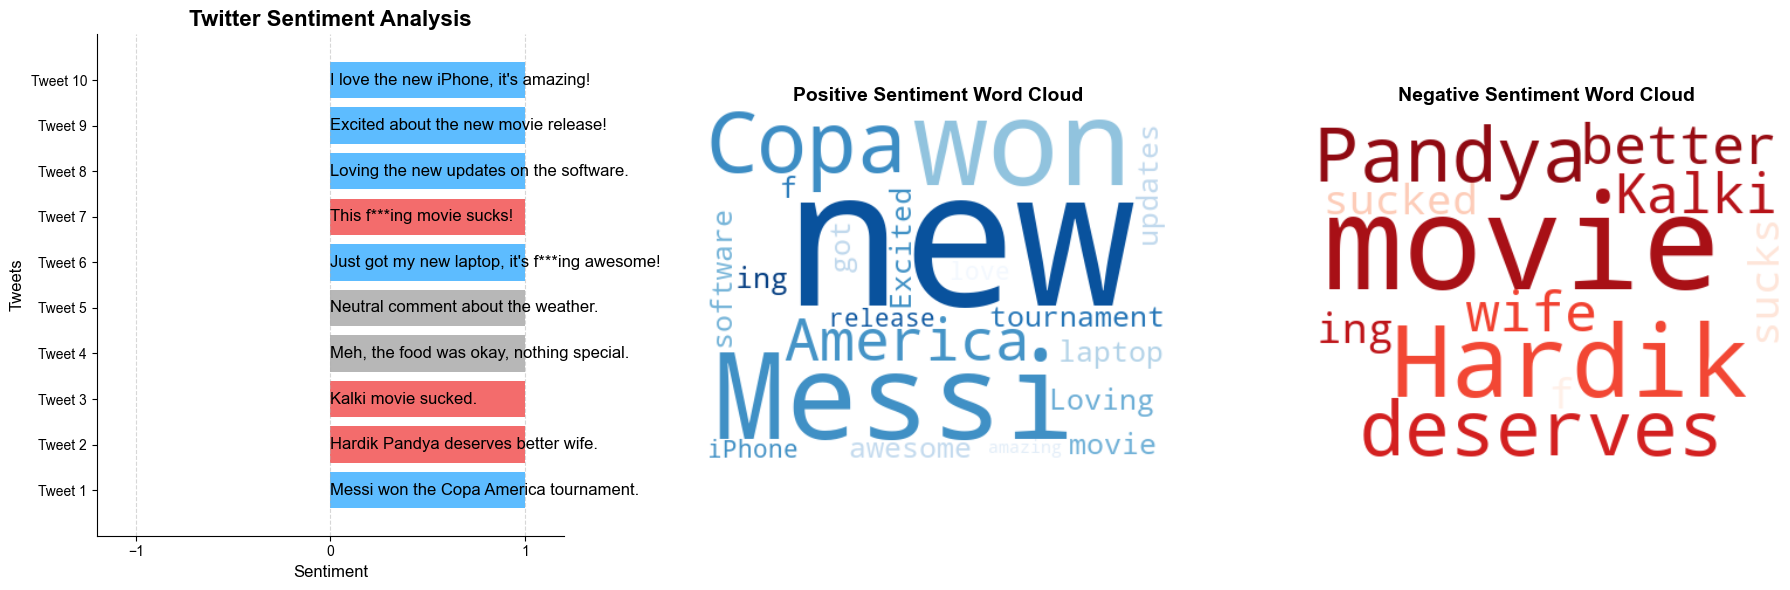

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Sample social media data (replace with your actual dataset)
data = {
    'text': [
        "Messi won the Copa America tournament.",
        "Hardik Pandya deserves better wife.",
        "Kalki movie sucked.",
        "Meh, the food was okay, nothing special.",
        "Neutral comment about the weather.",
        "Just got my new laptop, it's f***ing awesome!",
        "This f***ing movie sucks!",
        "Loving the new updates on the software.",
        "Excited about the new movie release!",
        "I love the new iPhone, it's amazing!"
    ],
    'sentiment': [
        'positive',
        'negative',
        'negative',
        'neutral',
        'neutral',
        'positive',
        'negative',
        'positive',
        'positive',
        'positive'
    ]
}

df = pd.DataFrame(data)

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    scores = sid.polarity_scores(text)
    return scores['compound']  # Use compound score for overall sentiment

# Apply sentiment analysis to each text
df['sentiment_score'] = df['text'].apply(get_sentiment_score)

# Separate positive and negative texts for word clouds
positive_texts = ' '.join(df[df['sentiment'] == 'positive']['text'])
negative_texts = ' '.join(df[df['sentiment'] == 'negative']['text'])

# Define custom colors for word clouds
positive_color = '#34acff'
negative_color = '#f04747'

# Plotting setup
plt.figure(figsize=(18, 6))

# Original sentiment analysis bar plot
plt.subplot(1, 3, 1)
for i, (text, sentiment) in enumerate(zip(df['text'], df['sentiment'])):
    plt.text(0, i, text, va='center', ha='left', wrap=True, fontsize=12, fontfamily='Arial', color='black')
    bar_color = '#34acff' if sentiment == 'positive' else '#f04747' if sentiment == 'negative' else '#a5a5a5'
    plt.barh(i, 1.0, color=bar_color, alpha=0.8)
plt.xlabel('Sentiment', fontsize=12, fontfamily='Arial')
plt.ylabel('Tweets', fontsize=12, fontfamily='Arial')
plt.title('Twitter Sentiment Analysis', fontsize=16, fontweight='bold', fontfamily='Arial')
plt.yticks(range(len(df['text'])), ['Tweet {}'.format(i+1) for i in range(len(df['text']))], fontsize=10, fontfamily='Arial')
plt.xticks(np.arange(-1, 2, 1), fontsize=10, fontfamily='Arial')
plt.ylim(-1, len(df['text']))
plt.xlim(-1.2, 1.2)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Positive sentiment word cloud
plt.subplot(1, 3, 2)
wordcloud_pos = WordCloud(width=400, height=300, background_color='white', colormap='Blues').generate(positive_texts)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.axis('off')

# Negative sentiment word cloud
plt.subplot(1, 3, 3)
wordcloud_neg = WordCloud(width=400, height=300, background_color='white', colormap='Reds').generate(negative_texts)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.axis('off')

plt.tight_layout()
plt.show()
